<a href="https://colab.research.google.com/github/Soufiane19-ai/TP1-IA/blob/main/TP1_Partie_1_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NOTEBOOK 0

In [2]:
# Installation des bibliothèques (décommentez si nécessaire)
!pip install pandas numpy matplotlib seaborn scikit-learn
!pip install scipy mlflow fastapi uvicorn
!pip install scikit-surprise  # Pour le filtrage collaboratif




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.9/753.9 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ...

In [3]:
# Manipulation de données
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.ensemble import RandomForestClassifier

# Configuration
import warnings
warnings.filterwarnings('ignore')

# Style des graphiques
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print(" Imports réussis !")

 Imports réussis !


In [4]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Configuration pour la reproductibilité
np.random.seed(42)
random.seed(42)

# Paramètres de génération
N_USERS = 5000
N_PRODUCTS = 1000
N_INTERACTIONS = 50000

print(" Génération des données synthétiques en cours...")
print(f"   Utilisateurs : {N_USERS}")
print(f"   Produits : {N_PRODUCTS}")
print(f"   Interactions : {N_INTERACTIONS}")
print()

# ============================================================================
# 1. GÉNÉRATION DES UTILISATEURS
# ============================================================================
print("👥 Génération des utilisateurs...")

# Âges avec distribution réaliste (18-70 ans, pic à 25-40)
ages = np.concatenate([
    np.random.normal(30, 8, N_USERS // 2),  # Jeunes adultes
    np.random.normal(50, 10, N_USERS // 2)  # Adultes plus âgés
])
ages = np.clip(ages, 18, 70).astype(int)

# Genres
genders = np.random.choice(['M', 'F', 'Other'], N_USERS, p=[0.48, 0.48, 0.04])

# Localisation (départements français)
departments = ['75', '13', '69', '31', '44', '33', '59', '34', '35', '67']
locations = np.random.choice(departments, N_USERS, p=[0.20, 0.10, 0.10, 0.08, 0.07, 0.07, 0.08, 0.08, 0.07, 0.15])

# Date d'inscription (sur les 2 dernières années)
start_date = datetime.now() - timedelta(days=730)
registration_dates = [start_date + timedelta(days=random.randint(0, 730)) for _ in range(N_USERS)]

# Niveau d'activité (1=faible, 5=très actif)
activity_level = np.random.choice([1, 2, 3, 4, 5], N_USERS, p=[0.30, 0.25, 0.25, 0.15, 0.05])

users_df = pd.DataFrame({
    'user_id': range(1, N_USERS + 1),
    'age': ages,
    'gender': genders,
    'location': locations,
    'registration_date': registration_dates,
    'activity_level': activity_level
})

print(f"   {len(users_df)} utilisateurs créés")

# ============================================================================
# 2. GÉNÉRATION DES PRODUITS
# ============================================================================
print("📦 Génération des produits...")

# Catégories de produits tech
categories = [
    'Ordinateurs', 'Smartphones', 'Tablettes', 'Accessoires',
    'Audio', 'Photo', 'Gaming', 'Wearables', 'Smart Home', 'Composants'
]

# Sous-catégories par catégorie
subcategories_map = {
    'Ordinateurs': ['Laptop', 'Desktop', 'Ultrabook', 'Workstation'],
    'Smartphones': ['Android', 'iPhone', 'Feature Phone'],
    'Tablettes': ['iPad', 'Android Tablet', 'Windows Tablet'],
    'Accessoires': ['Clavier', 'Souris', 'Casque', 'Housse', 'Cable'],
    'Audio': ['Casque Bluetooth', 'Enceinte', 'Écouteurs', 'Soundbar'],
    'Photo': ['Appareil Photo', 'Objectif', 'Drone', 'Stabilisateur'],
    'Gaming': ['Console', 'Jeux', 'Manette', 'PC Gaming'],
    'Wearables': ['Smartwatch', 'Bracelet Connecté', 'Lunettes AR'],
    'Smart Home': ['Caméra', 'Thermostat', 'Alarme', 'Éclairage'],
    'Composants': ['Processeur', 'Carte Graphique', 'RAM', 'SSD']
}

product_categories = np.random.choice(categories, N_PRODUCTS, p=[0.15, 0.15, 0.08, 0.18, 0.10, 0.08, 0.12, 0.05, 0.06, 0.03])
product_subcategories = [random.choice(subcategories_map[cat]) for cat in product_categories]

# Noms de produits réalistes
brands = ['Apple', 'Samsung', 'Lenovo', 'HP', 'Dell', 'Sony', 'LG', 'Xiaomi', 'Asus', 'Acer']
product_names = [
    f"{random.choice(brands)} {cat} {subcat} {random.choice(['Pro', 'Plus', 'Max', 'Lite', 'Standard'])}"
    for cat, subcat in zip(product_categories, product_subcategories)
]

# Prix avec distribution réaliste par catégorie
price_ranges = {
    'Ordinateurs': (500, 3000),
    'Smartphones': (200, 1500),
    'Tablettes': (150, 1200),
    'Accessoires': (10, 200),
    'Audio': (30, 500),
    'Photo': (300, 5000),
    'Gaming': (200, 2000),
    'Wearables': (100, 800),
    'Smart Home': (50, 500),
    'Composants': (50, 2000)
}

prices = [
    round(np.random.uniform(price_ranges[cat][0], price_ranges[cat][1]), 2)
    for cat in product_categories
]

# Stock disponible
stock = np.random.randint(0, 500, N_PRODUCTS)

# Note moyenne initiale (avant interactions)
initial_rating = np.random.uniform(3.5, 5.0, N_PRODUCTS).round(1)

# Date d'ajout au catalogue
product_add_dates = [start_date + timedelta(days=random.randint(0, 700)) for _ in range(N_PRODUCTS)]

products_df = pd.DataFrame({
    'product_id': range(1, N_PRODUCTS + 1),
    'name': product_names,
    'category': product_categories,
    'subcategory': product_subcategories,
    'price': prices,
    'stock': stock,
    'initial_rating': initial_rating,
    'added_date': product_add_dates
})

print(f"    {len(products_df)} produits créés")

# ============================================================================
# 3. GÉNÉRATION DES INTERACTIONS
# ============================================================================
print("🔗 Génération des interactions...")

# Types d'interactions
interaction_types = ['view', 'add_to_cart', 'purchase', 'review']

# Générer les interactions avec des patterns réalistes
interactions_list = []

# Créer une matrice de préférences utilisateur-catégorie
user_category_preference = {}
for user_id in range(1, N_USERS + 1):
    # Chaque utilisateur a 2-3 catégories préférées
    n_preferred = random.randint(2, 3)
    preferred_cats = random.sample(categories, n_preferred)
    user_category_preference[user_id] = preferred_cats

for _ in range(N_INTERACTIONS):
    # Sélectionner un utilisateur (plus actif = plus de chances)
    user_id = random.choices(
        users_df['user_id'].tolist(),
        weights=users_df['activity_level'].tolist()
    )[0]

    # Sélectionner un produit (favoriser les catégories préférées)
    user_prefs = user_category_preference[user_id]

    # 70% de chances de choisir dans les catégories préférées
    if random.random() < 0.7:
        preferred_products = products_df[products_df['category'].isin(user_prefs)]
        if len(preferred_products) > 0:
            product = preferred_products.sample(1).iloc[0]
        else:
            product = products_df.sample(1).iloc[0]
    else:
        product = products_df.sample(1).iloc[0]

    product_id = product['product_id']

    # Type d'interaction (funnel réaliste)
    # view (70%) -> add_to_cart (20%) -> purchase (8%) -> review (2%)
    interaction_type = np.random.choice(
        interaction_types,
        p=[0.70, 0.20, 0.08, 0.02]
    )

    # Date d'interaction (entre l'inscription de l'user et aujourd'hui)
    user_reg_date = users_df[users_df['user_id'] == user_id]['registration_date'].iloc[0]
    product_add_date = product['added_date']

    # L'interaction doit être après les deux dates
    min_date = max(user_reg_date, product_add_date)
    max_date = datetime.now()

    if min_date < max_date:
        days_diff = (max_date - min_date).days
        interaction_date = min_date + timedelta(days=random.randint(0, days_diff))
    else:
        interaction_date = max_date

    # Rating (seulement pour purchase et review)
    if interaction_type in ['purchase', 'review']:
        # Distribution réaliste des notes (plus de 4-5 étoiles)
        rating = np.random.choice([1, 2, 3, 4, 5], p=[0.05, 0.05, 0.15, 0.35, 0.40])
    else:
        rating = None

    # Durée de session (en secondes) pour les views
    if interaction_type == 'view':
        session_duration = int(np.random.exponential(60))  # Moyenne 60 secondes
    else:
        session_duration = None

    interactions_list.append({
        'interaction_id': len(interactions_list) + 1,
        'user_id': user_id,
        'product_id': product_id,
        'interaction_type': interaction_type,
        'interaction_date': interaction_date,
        'rating': rating,
        'session_duration': session_duration
    })

interactions_df = pd.DataFrame(interactions_list)

# Trier par date
interactions_df = interactions_df.sort_values('interaction_date').reset_index(drop=True)
interactions_df['interaction_id'] = range(1, len(interactions_df) + 1)

print(f"    {len(interactions_df)} interactions créées")

# ============================================================================
# 4. AJOUT DE DONNÉES COMPLÉMENTAIRES
# ============================================================================
print("🔧 Ajout de données complémentaires...")

# Ajouter des descriptions de produits (pour content-based filtering)
adjectives = ['Performant', 'Élégant', 'Innovant', 'Puissant', 'Compact', 'Révolutionnaire', 'Premium', 'Polyvalent']
features = ['Design moderne', 'Haute performance', 'Longue autonomie', 'Connectivité avancée', 'Interface intuitive']

descriptions = []
for idx, row in products_df.iterrows():
    desc = f"{random.choice(adjectives)} {row['name']}. "
    desc += f"{random.choice(features)}. "
    desc += f"Idéal pour {row['subcategory'].lower()}. "
    desc += f"Catégorie {row['category']}."
    descriptions.append(desc)

products_df['description'] = descriptions

# ============================================================================
# 5. STATISTIQUES ET VÉRIFICATIONS
# ============================================================================
print("\n Statistiques des données générées :")
print(f"   Utilisateurs : {len(users_df)}")
print(f"   Produits : {len(products_df)}")
print(f"   Interactions : {len(interactions_df)}")
print()

print("   Distribution des interactions :")
print(interactions_df['interaction_type'].value_counts())
print()

print("   Distribution des catégories de produits :")
print(products_df['category'].value_counts().head())
print()

# ============================================================================
# 6. SAUVEGARDE DES FICHIERS CSV
# ============================================================================
print(" Sauvegarde des fichiers...")

users_df.to_csv('users.csv', index=False)
print("    users.csv créé")

products_df.to_csv('products.csv', index=False)
print("    products.csv créé")

interactions_df.to_csv('interactions.csv', index=False)
print("    interactions.csv créé")

# ============================================================================
# 7. CRÉATION D'UN FICHIER DE MÉTA-DONNÉES
# ============================================================================
metadata = {
    'generation_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'n_users': len(users_df),
    'n_products': len(products_df),
    'n_interactions': len(interactions_df),
    'date_range': f"{interactions_df['interaction_date'].min()} to {interactions_df['interaction_date'].max()}",
    'categories': products_df['category'].unique().tolist(),
    'interaction_types': interactions_df['interaction_type'].unique().tolist()
}

import json
with open('metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2, default=str)

print("    metadata.json créé")

print("\n Génération terminée avec succès !")
print("\n Fichiers créés :")
print("   - users.csv")
print("   - products.csv")
print("   - interactions.csv")
print("   - metadata.json")
print("\n Vous pouvez maintenant commencer le TP !")

 Génération des données synthétiques en cours...
   Utilisateurs : 5000
   Produits : 1000
   Interactions : 50000

👥 Génération des utilisateurs...
   5000 utilisateurs créés
📦 Génération des produits...
    1000 produits créés
🔗 Génération des interactions...
    50000 interactions créées
🔧 Ajout de données complémentaires...

 Statistiques des données générées :
   Utilisateurs : 5000
   Produits : 1000
   Interactions : 50000

   Distribution des interactions :
interaction_type
view           34965
add_to_cart    10034
purchase        3988
review          1013
Name: count, dtype: int64

   Distribution des catégories de produits :
category
Accessoires    175
Ordinateurs    150
Smartphones    133
Gaming         128
Audio          103
Name: count, dtype: int64

 Sauvegarde des fichiers...
    users.csv créé
    products.csv créé
    interactions.csv créé
    metadata.json créé

 Génération terminée avec succès !

 Fichiers créés :
   - users.csv
   - products.csv
   - interactions.cs

# NOTEBOOK 01

In [5]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [6]:
# --- Chargement des 3 fichiers CSV ---

import pandas as pd

# Chemin complet de chaque fichier
users_path = r"C:\Users\soufiane\Documents\TP IA\users.csv"
products_path = r"C:\Users\soufiane\Documents\TP IA\products.csv"
interactions_path = r"C:\Users\soufiane\Documents\TP IA\interactions.csv"



# Confirmation
print(" Données chargées avec succès !")
print("Users :", users_df.shape)
print("Products :", products_df.shape)
print("Interactions :", interactions_df.shape)

 Données chargées avec succès !
Users : (5000, 6)
Products : (1000, 9)
Interactions : (50000, 7)


In [7]:
# 1.2 - Exploration initiale

# Combien d'utilisateurs uniques ?
nb_users = users_df["user_id"].nunique()

# Combien de produits différents ?
nb_products = products_df["product_id"].nunique()

# Combien d'interactions au total ?
nb_interactions = len(interactions_df)

print(" Nombre d'utilisateurs uniques :", nb_users)
print(" Nombre de produits différents :", nb_products)
print("Nombre total d'interactions :", nb_interactions)
print("-" * 60)

# === UTILISATEURS ===
print("=== UTILISATEURS ===")
print(users_df.head())          # 5 premières lignes
print(users_df.shape)           # dimensions (lignes, colonnes)
print(users_df.dtypes)          # types de colonnes

# === PRODUITS ===
print("\n=== PRODUITS ===")
print(products_df.head())
print(products_df.shape)
print(products_df.dtypes)

# === INTERACTIONS ===
print("\n=== INTERACTIONS ===")
print(interactions_df.head())
print(interactions_df.shape)
print(interactions_df.dtypes)


 Nombre d'utilisateurs uniques : 5000
 Nombre de produits différents : 1000
Nombre total d'interactions : 50000
------------------------------------------------------------
=== UTILISATEURS ===
   user_id  age gender location          registration_date  activity_level
0        1   33      M       69 2025-08-23 20:30:57.647086               2
1        2   28      M       75 2024-03-01 20:30:57.647086               2
2        3   35      M       67 2023-12-03 20:30:57.647086               2
3        4   42      M       31 2024-08-15 20:30:57.647086               2
4        5   28      M       69 2024-07-15 20:30:57.647086               1
(5000, 6)
user_id                       int64
age                           int64
gender                       object
location                     object
registration_date    datetime64[ns]
activity_level                int64
dtype: object

=== PRODUITS ===
   product_id                                name     category  \
0           1  Dell Photo Appare

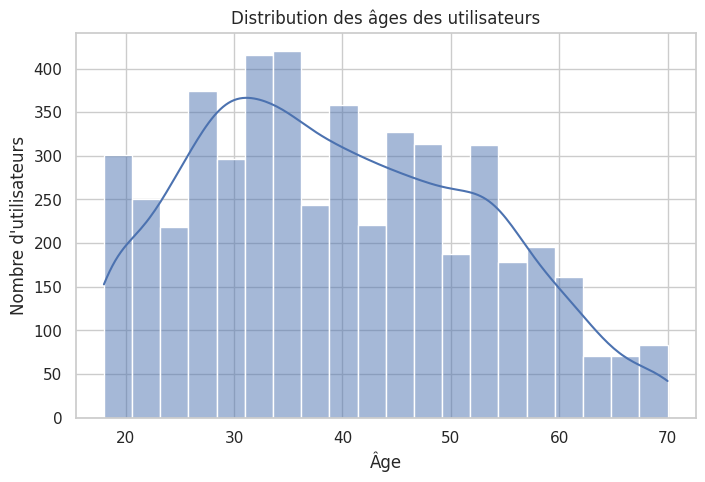

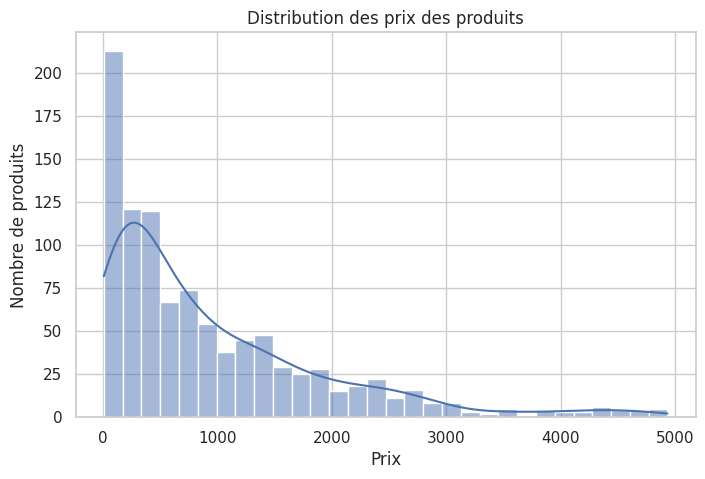

⚠️ Colonne 'event_type' absente de interactions_df


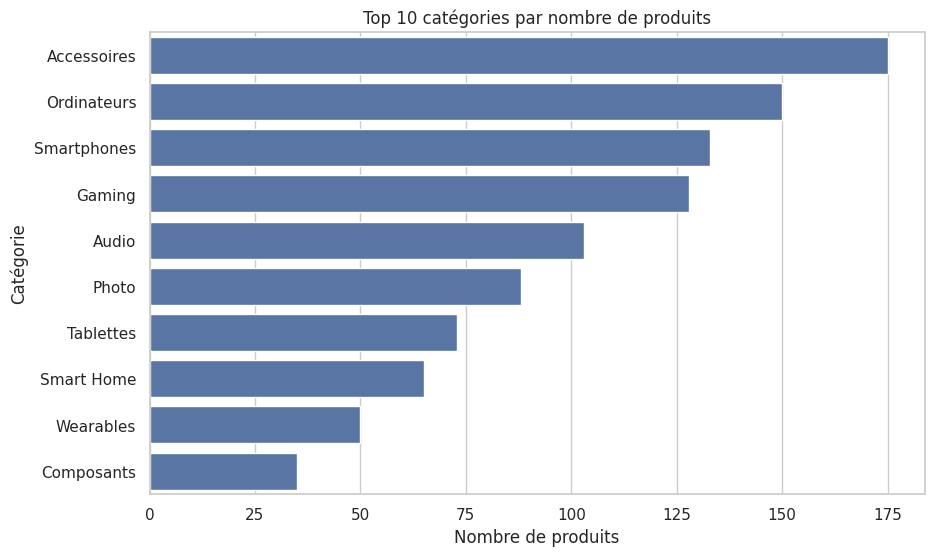

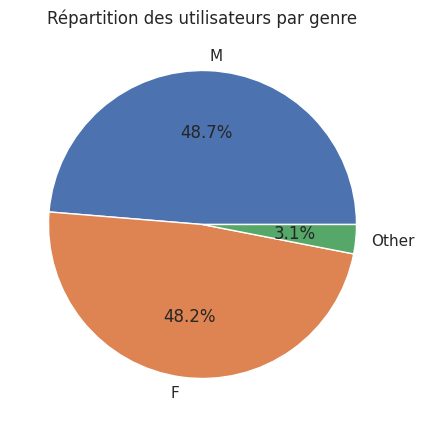

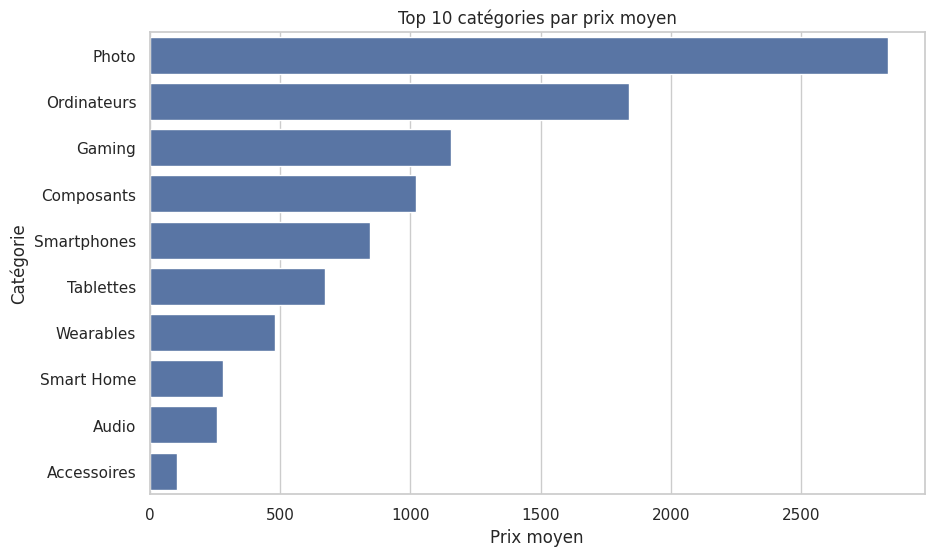

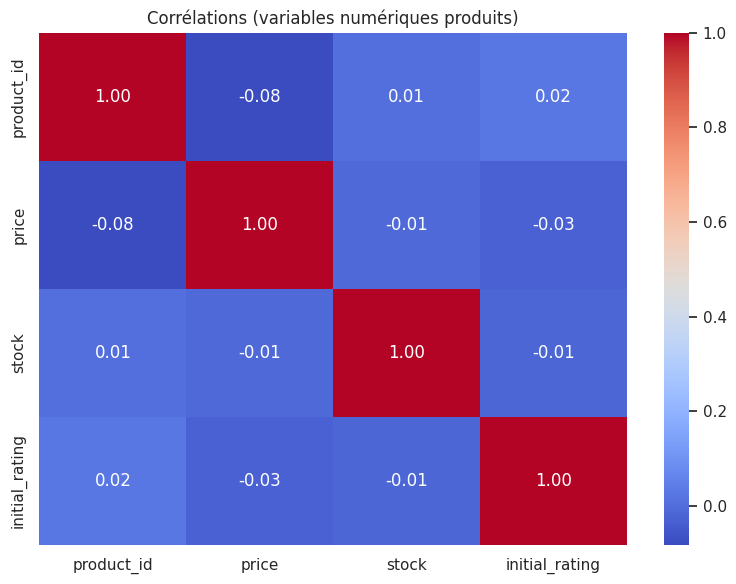

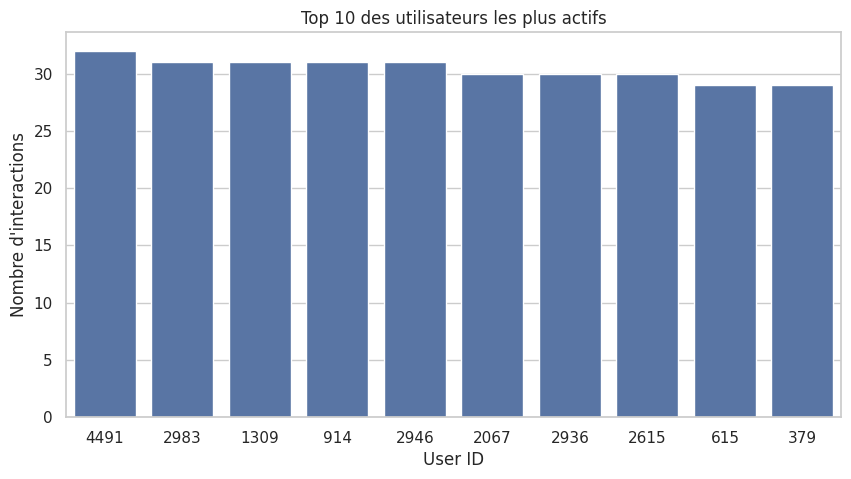

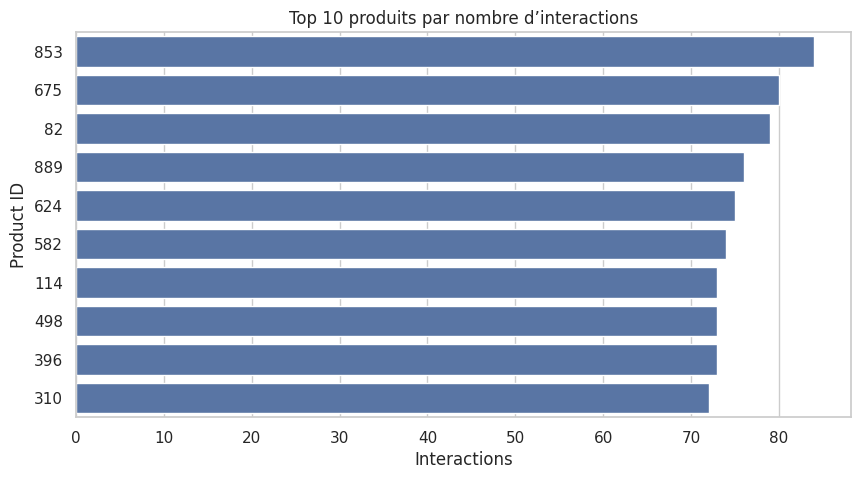

In [8]:
# === Exploration 1.3 : Visualisations principales + graphiques complémentaires ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Thème général
sns.set(style="whitegrid")

# ---------- Pré-traitements sûrs ----------
# Convertir certains champs si présents
if "ts" in interactions_df.columns and not np.issubdtype(interactions_df["ts"].dtype, np.datetime64):
    interactions_df["ts"] = pd.to_datetime(interactions_df["ts"], errors="coerce")

for col in ("age",):
    if col in users_df.columns:
        users_df[col] = pd.to_numeric(users_df[col], errors="coerce")

for col in ("price", "rating", "product_popularity", "product_score"):
    if col in products_df.columns:
        products_df[col] = pd.to_numeric(products_df[col], errors="coerce")

# ---------- 1) Distribution des âges ----------
if "age" in users_df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(users_df["age"].dropna(), bins=20, kde=True)
    plt.title("Distribution des âges des utilisateurs")
    plt.xlabel("Âge")
    plt.ylabel("Nombre d'utilisateurs")
    plt.show()
else:
    print("⚠️ Colonne 'age' absente de users_df")

# ---------- 2) Distribution des prix ----------
if "price" in products_df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(products_df["price"].dropna(), bins=30, kde=True)
    plt.title("Distribution des prix des produits")
    plt.xlabel("Prix")
    plt.ylabel("Nombre de produits")
    plt.show()
else:
    print("⚠️ Colonne 'price' absente de products_df")

# ---------- 3) Types d’interactions ----------
if "event_type" in interactions_df.columns:
    plt.figure(figsize=(7,5))
    order = interactions_df["event_type"].value_counts().index
    sns.countplot(x="event_type", data=interactions_df, order=order)
    plt.title("Distribution des types d'interactions")
    plt.xlabel("Type d'interaction")
    plt.ylabel("Fréquence")
    plt.show()
else:
    print("⚠️ Colonne 'event_type' absente de interactions_df")

# ---------- 4) Top 10 catégories (par nb de produits) ----------
if "category" in products_df.columns:
    plt.figure(figsize=(10,6))
    top_cats = products_df["category"].value_counts().head(10)
    sns.barplot(x=top_cats.values, y=top_cats.index)
    plt.title("Top 10 catégories par nombre de produits")
    plt.xlabel("Nombre de produits")
    plt.ylabel("Catégorie")
    plt.show()
else:
    print("⚠️ Colonne 'category' absente de products_df")

# ======================= Graphiques complémentaires =======================

# ---------- 5) Répartition des utilisateurs par genre ----------
if "gender" in users_df.columns:
    plt.figure(figsize=(5,5))
    gender_counts = users_df["gender"].value_counts(dropna=False)
    plt.pie(gender_counts, labels=gender_counts.index.astype(str), autopct="%1.1f%%")
    plt.title("Répartition des utilisateurs par genre")
    plt.show()

# ---------- 6) Volume d'interactions par heure ----------
if "ts" in interactions_df.columns:
    hours = interactions_df["ts"].dt.hour.dropna().astype("Int64")
    plt.figure(figsize=(10,5))
    sns.countplot(x=hours)
    plt.title("Volume d'interactions par heure")
    plt.xlabel("Heure")
    plt.ylabel("Nombre d'interactions")
    plt.show()

# ---------- 7) Série temporelle : interactions par jour ----------
if "ts" in interactions_df.columns:
    daily = interactions_df.set_index("ts").resample("D").size()
    plt.figure(figsize=(12,5))
    plt.plot(daily.index, daily.values)
    plt.title("Évolution du nombre d'interactions par jour")
    plt.xlabel("Date")
    plt.ylabel("Interactions")
    plt.tight_layout()
    plt.show()

# ---------- 8) Prix moyen par catégorie (Top 10) ----------
if {"category", "price"}.issubset(products_df.columns):
    mean_price_by_cat = (
        products_df.dropna(subset=["price"])
        .groupby("category")["price"].mean()
        .sort_values(ascending=False)
        .head(10)
    )
    plt.figure(figsize=(10,6))
    sns.barplot(x=mean_price_by_cat.values, y=mean_price_by_cat.index)
    plt.title("Top 10 catégories par prix moyen")
    plt.xlabel("Prix moyen")
    plt.ylabel("Catégorie")
    plt.show()

# ---------- 9) Heatmap de corrélation (produits) ----------
num_prod = products_df.select_dtypes(include=[np.number])
if num_prod.shape[1] >= 2:
    plt.figure(figsize=(8,6))
    sns.heatmap(num_prod.corr(), annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Corrélations (variables numériques produits)")
    plt.tight_layout()
    plt.show()

# ---------- 10) Top 10 des utilisateurs les plus actifs ----------
if "user_id" in interactions_df.columns:
    top_users = interactions_df["user_id"].value_counts().head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_users.index.astype(str), y=top_users.values)
    plt.title("Top 10 des utilisateurs les plus actifs")
    plt.xlabel("User ID")
    plt.ylabel("Nombre d'interactions")
    plt.show()

# ---------- 11) Top catégories par nombre d’achats ----------
if {"event_type", "product_id"}.issubset(interactions_df.columns) and "category" in products_df.columns:
    purchases = interactions_df[interactions_df["event_type"] == "purchase"]
    merged = purchases.merge(products_df[["product_id", "category"]], on="product_id", how="left")
    top_purchase_cats = merged["category"].value_counts().head(10)
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_purchase_cats.values, y=top_purchase_cats.index)
    plt.title("Top 10 catégories par nombre d’achats")
    plt.xlabel("Achats")
    plt.ylabel("Catégorie")
    plt.show()

# ---------- 12) (option) Top produits par interactions ----------
if "product_id" in interactions_df.columns:
    top_prods = interactions_df["product_id"].value_counts().head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_prods.values, y=top_prods.index.astype(str))
    plt.title("Top 10 produits par nombre d’interactions")
    plt.xlabel("Interactions")
    plt.ylabel("Product ID")
    plt.show()


# NOTEBOOK 02

In [9]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


In [10]:
# Conversion des colonnes de dates
if "registration_date" in users_df.columns:
    users_df["registration_date"] = pd.to_datetime(users_df["registration_date"], errors="coerce")

if "added_date" in products_df.columns:
    products_df["added_date"] = pd.to_datetime(products_df["added_date"], errors="coerce")

if "interaction_date" in interactions_df.columns:
    interactions_df["interaction_date"] = pd.to_datetime(interactions_df["interaction_date"], errors="coerce")

print(" Données chargées et dates converties avec succès !")


 Données chargées et dates converties avec succès !


In [11]:
# === 2.1 Création des Features Utilisateurs ===
import pandas as pd

# 1 Niveau d'activité → nombre d'interactions par utilisateur
user_activity = interactions_df.groupby("user_id").size().reset_index(name="activity_level")

# 2 Panier moyen → prix moyen des produits consultés ou achetés
user_avg_price = interactions_df.merge(products_df, on="product_id", how="left") \
                                .groupby("user_id")["price"].mean().reset_index(name="avg_price")

# 3 Catégorie préférée → catégorie la plus fréquente parmi les interactions
user_favorite_category = interactions_df.merge(products_df, on="product_id", how="left") \
    .groupby("user_id")["category"] \
    .agg(lambda x: x.value_counts().index[0]) \
    .reset_index(name="favorite_category")

# 4 Ancienneté depuis la dernière activité → jours depuis la dernière interaction
user_days_since_last = interactions_df.groupby("user_id")["interaction_date"].max().reset_index()
user_days_since_last["days_since_last"] = (pd.Timestamp.now() - user_days_since_last["interaction_date"]).dt.days
user_days_since_last = user_days_since_last[["user_id", "days_since_last"]]

# 5 Fusion des features dans un seul DataFrame
users_features = users_df.copy()
users_features = users_features.merge(user_activity, on="user_id", how="left")
users_features = users_features.merge(user_avg_price, on="user_id", how="left")
users_features = users_features.merge(user_favorite_category, on="user_id", how="left")
users_features = users_features.merge(user_days_since_last, on="user_id", how="left")

print(f"Features utilisateurs créées : {users_features.shape}")
display(users_features.head())



Features utilisateurs créées : (5000, 10)


,user_id,age,gender,location,registration_date,activity_level_x,activity_level_y,avg_price,favorite_category,days_since_last
0,1,33,M,69,2025-08-23 20:30:57.647086,2,9.0,1291.320000,Ordinateurs,16.0
1,2,28,M,75,2024-03-01 20:30:57.647086,2,5.0,262.958000,Tablettes,85.0
2,3,35,M,67,2023-12-03 20:30:57.647086,2,6.0,1217.290000,Gaming,17.0
3,4,42,M,31,2024-08-15 20:30:57.647086,2,7.0,565.297143,Audio,9.0
4,5,28,M,69,2024-07-15 20:30:57.647086,1,1.0,2609.630000,Ordinateurs,353.0


In [12]:
# === 2.2
# TODO : Créer les features produits

# 1. Popularité
product_popularity = interactions_df.groupby("product_id").size().reset_index(name="popularity")

# 2. Taux de conversion (achats / vues)
views = interactions_df[interactions_df["interaction_type"] == "view"].groupby("product_id").size()
purchases = interactions_df[interactions_df["interaction_type"] == "purchase"].groupby("product_id").size()
product_conversion = (purchases / views).fillna(0).reset_index(name="conversion_rate")

# 3. Note moyenne
product_avg_rating = interactions_df.groupby("product_id")["rating"].mean().reset_index(name="avg_rating")

# 4. Gamme de prix
def categorize_price(price):
    if price < 50:
        return "low"
    elif price < 150:
        return "mid"
    else:
        return "high"

# Fusion des features
products_features = products_df.copy()
products_features["price_band"] = products_features["price"].apply(categorize_price)
products_features = products_features.merge(product_popularity, on="product_id", how="left")
products_features = products_features.merge(product_conversion, on="product_id", how="left")
products_features = products_features.merge(product_avg_rating, on="product_id", how="left")

print(f"Features produits créées : {products_features.shape}")
products_features.head()



Features produits créées : (1000, 13)


,product_id,name,category,subcategory,price,stock,initial_rating,added_date,description,price_band,popularity,conversion_rate,avg_rating
0,1,Dell Photo Appareil Photo Standard,Photo,Appareil Photo,4526.99,190,3.7,2025-08-29 20:30:57.647086,Performant Dell Photo Appareil Photo Standard....,high,57,0.093023,4.000000
1,2,Xiaomi Ordinateurs Laptop Plus,Ordinateurs,Laptop,895.93,217,4.2,2024-07-15 20:30:57.647086,Élégant Xiaomi Ordinateurs Laptop Plus. Connec...,high,44,0.161290,3.400000
2,3,Sony Ordinateurs Desktop Pro,Ordinateurs,Desktop,2786.19,428,5.0,2023-12-07 20:30:57.647086,Performant Sony Ordinateurs Desktop Pro. Desig...,high,45,0.096774,4.333333
3,4,Lenovo Accessoires Cable Pro,Accessoires,Cable,176.90,153,3.7,2024-03-09 20:30:57.647086,Puissant Lenovo Accessoires Cable Pro. Design ...,high,49,0.060606,3.333333
4,5,Asus Smartphones iPhone Pro,Smartphones,iPhone,690.03,276,4.9,2024-08-17 20:30:57.647086,Premium Asus Smartphones iPhone Pro. Design mo...,high,55,0.138889,4.500000


In [13]:
# TODO : Normalisation et encodage

# 🔹 Normalisation des features numériques
scaler = StandardScaler()
num_cols = ["activity_level", "avg_price", "days_since_last", "popularity", "conversion_rate", "avg_rating"]

for col in num_cols:
    if col in users_features.columns:
        users_features[col] = scaler.fit_transform(users_features[[col]])
    elif col in products_features.columns:
        products_features[col] = scaler.fit_transform(products_features[[col]])

#  Encodage des features catégorielles
label_encoders = {}
cat_cols = ["favorite_category", "price_band"]

for col in cat_cols:
    if col in users_features.columns:
        le = LabelEncoder()
        users_features[col] = le.fit_transform(users_features[col].astype(str))
        label_encoders[col] = le
    elif col in products_features.columns:
        le = LabelEncoder()
        products_features[col] = le.fit_transform(products_features[col].astype(str))
        label_encoders[col] = le

print("Normalisation et encodage terminés")


Normalisation et encodage terminés


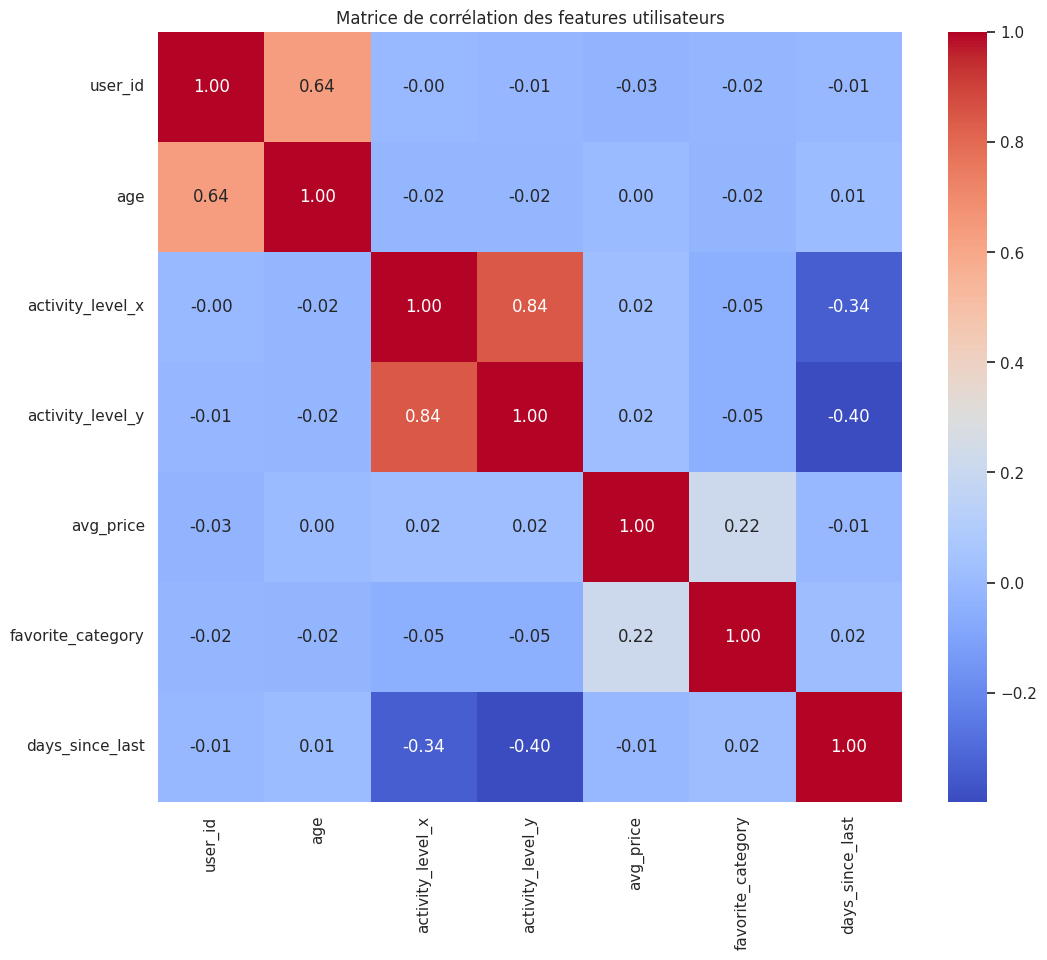

In [14]:
# === 2.4
# TODO : Matrice de corrélation

# Créer une matrice de corrélation
corr_matrix = users_features.corr(numeric_only=True)

# Visualiser avec une heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation des features utilisateurs")
plt.show()


# NOTEBOOK 03

In [15]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


In [17]:
import pandas as pd
from pathlib import Path

FILENAMES = ["users.csv", "products.csv", "interactions.csv"]

# 1) Candidats de chemins (Colab, dossier courant, ./content)
candidates = [
    Path("/content"),
    Path.cwd(),
    Path.cwd() / "content",
]

def pick_data_path():
    for base in candidates:
        if all((base / f).exists() for f in FILENAMES):
            return base.resolve()
    # Dernière chance : chercher par nom de fichier
    found = {}
    try:
        for f in FILENAMES:
            hits = list(Path("/").rglob(f))  # peut prendre 1–2s
            if hits:
                found[f] = hits[0].parent
        # si tous trouvés et même dossier, on l'utilise
        if found and len({p for p in found.values()}) == 1:
            return list(found.values())[0].resolve()
    except Exception:
        pass
    return None

DATA_PATH = pick_data_path()

if DATA_PATH is None:
    print(" Fichiers introuvables aux emplacements testés.")
    print(f"cwd = {Path.cwd()}")
    print("Vérifie que tes fichiers sont bien dans /content (Colab) ou ./content (local).")
else:
    print(f" Dossier de données détecté : {DATA_PATH}")
    print("Fichiers détectés :")
    for f in FILENAMES:
        print(f" - {f} -> {DATA_PATH / f}")

    # 2) Lecture
    users_df        = pd.read_csv(DATA_PATH / "users.csv")
    products_df     = pd.read_csv(DATA_PATH / "products.csv")
    interactions_df = pd.read_csv(DATA_PATH / "interactions.csv")

    # 3) Conversion des dates si les colonnes existent
    for df, col in [
        (users_df, "registration_date"),
        (products_df, "added_date"),
        (interactions_df, "interaction_date"),
    ]:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors="coerce")

    print(f"\nDonnées chargées : {len(users_df)} users, {len(products_df)} products, {len(interactions_df)} interactions")

    # 4) Aperçu (si tu es dans un notebook)
    try:
        display(users_df.head())
        display(products_df.head())
        display(interactions_df.head())
    except NameError:
        print(users_df.head(), products_df.head(), interactions_df.head(), sep="\n\n")


 Dossier de données détecté : /content
Fichiers détectés :
 - users.csv -> /content/users.csv
 - products.csv -> /content/products.csv
 - interactions.csv -> /content/interactions.csv

Données chargées : 5000 users, 1000 products, 50000 interactions


,user_id,age,gender,location,registration_date,activity_level
0,1,33,M,69,2025-08-23 20:30:57.647086,2
1,2,28,M,75,2024-03-01 20:30:57.647086,2
2,3,35,M,67,2023-12-03 20:30:57.647086,2
3,4,42,M,31,2024-08-15 20:30:57.647086,2
4,5,28,M,69,2024-07-15 20:30:57.647086,1


,product_id,name,category,subcategory,price,stock,initial_rating,added_date,description
0,1,Dell Photo Appareil Photo Standard,Photo,Appareil Photo,4526.99,190,3.7,2025-08-29 20:30:57.647086,Performant Dell Photo Appareil Photo Standard....
1,2,Xiaomi Ordinateurs Laptop Plus,Ordinateurs,Laptop,895.93,217,4.2,2024-07-15 20:30:57.647086,Élégant Xiaomi Ordinateurs Laptop Plus. Connec...
2,3,Sony Ordinateurs Desktop Pro,Ordinateurs,Desktop,2786.19,428,5.0,2023-12-07 20:30:57.647086,Performant Sony Ordinateurs Desktop Pro. Desig...
3,4,Lenovo Accessoires Cable Pro,Accessoires,Cable,176.90,153,3.7,2024-03-09 20:30:57.647086,Puissant Lenovo Accessoires Cable Pro. Design ...
4,5,Asus Smartphones iPhone Pro,Smartphones,iPhone,690.03,276,4.9,2024-08-17 20:30:57.647086,Premium Asus Smartphones iPhone Pro. Design mo...


,interaction_id,user_id,product_id,interaction_type,interaction_date,rating,session_duration
0,1,559,114,add_to_cart,2023-12-08 20:30:57.647086,NaN,NaN
1,2,907,593,view,2023-12-11 20:30:57.647086,NaN,8.0
2,3,907,872,view,2023-12-11 20:30:57.647086,NaN,14.0
3,4,367,195,view,2023-12-19 20:30:57.647086,NaN,71.0
4,5,180,314,view,2023-12-25 20:30:57.647086,NaN,24.0


In [18]:
# TODO : Créer la matrice utilisateur-produit

# Créer la matrice (utilisateurs en lignes, produits en colonnes)
# -> on pondère les interactions si 'event_type' existe, sinon binaire (=1)
weights = {"view": 1.0, "cart": 2.0, "purchase": 3.0}
tmp = interactions_df.copy()

if "event_type" in tmp.columns:
    tmp["score"] = tmp["event_type"].map(weights).fillna(1.0)
else:
    tmp["score"] = 1.0

ui_long = (
    tmp.groupby(["user_id", "product_id"], as_index=False)["score"]
       .sum()
)

user_item_matrix = ui_long.pivot_table(
    index="user_id",
    columns="product_id",
    values="score",
    aggfunc="sum",
    fill_value=0.0
).astype(float)

print(f"Matrice user-item : {user_item_matrix.shape}")
print(f"Sparsité : {(user_item_matrix.values == 0).sum() / user_item_matrix.size * 100: .2f}%")


Matrice user-item : (4974, 1000)
Sparsité :  99.01%


In [19]:
# TODO : Calculer la similarité entre utilisateurs

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Similarité cosinus sur les lignes (utilisateurs)
user_similarity = cosine_similarity(user_item_matrix.values)

# on met la diagonale à 0 pour ne pas s'auto-recommander
np.fill_diagonal(user_similarity, 0.0)

print(f"Matrice de similarité : {user_similarity.shape}")
print("Similarité calculée")


Matrice de similarité : (4974, 4974)
Similarité calculée


In [20]:
# TODO : Fonction de recommandation

import numpy as np
import pandas as pd

def recommend_user_based(
    user_id,
    user_item_matrix,
    user_similarity,
    k_neighbors=10,
    n_recommendations=5
):
    """
    Recommande des produits basés sur le filtrage collaboratif (user-based).

    Args:
        user_id: ID de l'utilisateur
        user_item_matrix: matrice utilisateur-produit (index=user_id, colonnes=product_id)
        user_similarity: matrice numpy (n_users x n_users)
        k_neighbors: nombre de voisins les plus similaires à considérer
        n_recommendations: nombre de recommandations à retourner

    Returns:
        DataFrame avec product_id et score_prédit (et méta-produits si dispo)
    """
    if user_id not in user_item_matrix.index:
        raise ValueError(f"user_id {user_id} absent de la matrice.")

    # index de l'utilisateur dans la matrice
    u_idx = user_item_matrix.index.get_loc(user_id)

    # vecteur des similarités vers tous les autres users
    sims = user_similarity[u_idx].copy()

    # top-k voisins (similarités décroissantes)
    # si moins de k users, on prend ce qu'on a
    k = min(k_neighbors, sims.shape[0])
    nn_idx = np.argsort(-sims)[:k]
    nn_sims = sims[nn_idx]  # (k,)

    # si toutes les similarités sont nulles -> pas de signal
    if np.all(nn_sims <= 0):
        return pd.DataFrame(columns=["product_id", "score_prédit"])

    # sous-matrice items des voisins (k x n_items)
    neighbor_items = user_item_matrix.values[nn_idx, :]

    # scores prédits = moyenne pondérée par la similarité
    denom = nn_sims.sum() + 1e-12
    preds = (neighbor_items.T @ nn_sims) / denom   # (n_items,)

    # on évite de recommander ce que l'utilisateur a déjà vu/acheté
    seen_mask = user_item_matrix.iloc[u_idx].values > 0
    preds[seen_mask] = -np.inf

    # top-N produits
    n = min(n_recommendations, preds.size)
    top_idx = np.argpartition(-preds, n-1)[:n]
    top_idx = top_idx[np.argsort(-preds[top_idx])]

    product_ids = user_item_matrix.columns.values[top_idx]
    scores = preds[top_idx]

    recs = pd.DataFrame({"product_id": product_ids, "score_prédit": scores})

    # joindre les infos produit si disponibles
    if "product_id" in products_df.columns:
        recs = recs.merge(products_df, on="product_id", how="left")

    return recs.reset_index(drop=True)

# Test
test_user = users_df["user_id"].iloc[0]
recommendations_cf = recommend_user_based(
    user_id=test_user,
    user_item_matrix=user_item_matrix,
    user_similarity=user_similarity,
    k_neighbors=50,
    n_recommendations=5
)

print(f"Recommandations pour l'utilisateur {test_user} :")
display(recommendations_cf)


Recommandations pour l'utilisateur 1 :


,product_id,score_prédit,name,category,subcategory,price,stock,initial_rating,added_date,description
0,806,0.085586,Samsung Smartphones iPhone Plus,Smartphones,iPhone,711.19,195,5.0,2024-08-21 20:30:57.647086,Puissant Samsung Smartphones iPhone Plus. Inte...
1,185,0.065537,HP Ordinateurs Workstation Standard,Ordinateurs,Workstation,1641.13,486,4.5,2024-09-24 20:30:57.647086,Puissant HP Ordinateurs Workstation Standard. ...
2,478,0.061717,Apple Ordinateurs Workstation Plus,Ordinateurs,Workstation,1682.30,499,4.5,2025-06-09 20:30:57.647086,Polyvalent Apple Ordinateurs Workstation Plus....
3,671,0.059111,Dell Audio Écouteurs Lite,Audio,Écouteurs,169.45,12,4.0,2025-02-12 20:30:57.647086,Innovant Dell Audio Écouteurs Lite. Interface ...
4,786,0.058084,HP Ordinateurs Laptop Pro,Ordinateurs,Laptop,1398.68,47,3.8,2025-06-24 20:30:57.647086,Puissant HP Ordinateurs Laptop Pro. Design mod...


In [21]:
# TODO : Créer un corpus textuel pour chaque produit

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

# Combiner nom, description, catégorie (adapte les noms si besoin)
name_col = "name" if "name" in products_df.columns else None
desc_col = "description" if "description" in products_df.columns else None
cat_col  = "category" if "category" in products_df.columns else None

def _safe_str(s):
    return "" if pd.isna(s) else str(s)

def build_content_row(row):
    parts = []
    if name_col: parts.append(_safe_str(row[name_col]))
    if desc_col: parts.append(_safe_str(row[desc_col]))
    if cat_col:  parts.append(_safe_str(row[cat_col]))
    return " ".join(parts).strip()

products_df["content"] = products_df.apply(build_content_row, axis=1)
products_df["content"] = products_df["content"].str.lower()

# Créer les embeddings TF-IDF
tfidf = TfidfVectorizer(max_features=200, stop_words='english')
product_vectors = tfidf.fit_transform(products_df["content"].fillna(""))

print(f"Vecteurs TF-IDF : {product_vectors.shape}")


Vecteurs TF-IDF : (1000, 89)


In [22]:
# TODO : Calculer la similarité entre produits

from sklearn.metrics.pairwise import cosine_similarity

product_similarity = cosine_similarity(product_vectors, dense_output=True)
np.fill_diagonal(product_similarity, 0.0)

print(f"Matrice de similarité produits : {product_similarity.shape}")
print("Similarité calculée")


Matrice de similarité produits : (1000, 1000)
Similarité calculée


In [23]:
# TODO : Fonction de recommandation content-based

import numpy as np
import pandas as pd

def recommend_content_based(
    user_id,
    interactions_df,
    products_df,
    product_similarity,
    n_recommendations=5,
    use_weights=True,
    recent_n=20
):
    """
    Recommande des produits similaires à ceux avec lesquels l'utilisateur a interagi.
    - On récupère les produits récents de l'utilisateur (achats priorisés).
    - Le score d'un item = moyenne pondérée des similarités avec ces produits.
    - On filtre les items déjà vus/achetés.
    """
    if user_id not in interactions_df["user_id"].values:
        return pd.DataFrame(columns=["product_id", "score"])

    # mapping product_id -> index de ligne dans products_df / product_similarity
    pid_to_idx = {pid: i for i, pid in enumerate(products_df["product_id"].values)}
    idx_to_pid = products_df["product_id"].values

    # Sous-ensemble interactions utilisateur
    ui = interactions_df[interactions_df["user_id"] == user_id].copy()
    if ui.empty:
        return pd.DataFrame(columns=["product_id", "score"])

    # Poids d'événements (si colonne event_type existe)
    weights_map = {"view": 1.0, "cart": 2.0, "purchase": 3.0}
    if "event_type" in ui.columns and use_weights:
        ui["w"] = ui["event_type"].map(weights_map).fillna(1.0)
    else:
        ui["w"] = 1.0

    # On garde les interactions les plus récentes si date dispo
    if "interaction_date" in ui.columns:
        ui = ui.sort_values("interaction_date", ascending=False).head(recent_n)
    else:
        ui = ui.head(recent_n)

    # Indices produits déjà vus / achetés
    seen_pids = ui["product_id"].unique()
    seen_idx = [pid_to_idx[p] for p in seen_pids if p in pid_to_idx]

    if not seen_idx:
        return pd.DataFrame(columns=["product_id", "score"])

    # Score = moyenne pondérée des similarités aux produits vus
    sims = product_similarity[:, seen_idx]                    # (n_items, n_seen)
    weights = ui.drop_duplicates("product_id").set_index("product_id")["w"]
    w = np.array([weights.get(pid, 1.0) for pid in seen_pids if pid in pid_to_idx])  # (n_seen,)

    scores = (sims @ w) / (w.sum() + 1e-12)                   # (n_items,)

    # On ne recommande pas ce qui est déjà vu
    scores[np.array(seen_idx, dtype=int)] = -np.inf

    # Top-N
    n = min(n_recommendations, len(scores))
    top_idx = np.argpartition(-scores, n-1)[:n]
    top_idx = top_idx[np.argsort(-scores[top_idx])]

    recs = pd.DataFrame({
        "product_id": idx_to_pid[top_idx],
        "score": scores[top_idx]
    })

    # joindre meta produits
    recs = recs.merge(products_df, on="product_id", how="left")
    return recs.reset_index(drop=True)

# Test
test_user = users_df["user_id"].iloc[0]
recommendations_content = recommend_content_based(
    user_id=test_user,
    interactions_df=interactions_df,
    products_df=products_df,
    product_similarity=product_similarity,
    n_recommendations=5
)

print(f"Recommandations content-based pour l'utilisateur {test_user} :")
display(recommendations_content)


Recommandations content-based pour l'utilisateur 1 :


,product_id,score,name,category,subcategory,price,stock,initial_rating,added_date,description,content
0,540,0.347695,HP Ordinateurs Laptop Plus,Ordinateurs,Laptop,2128.57,128,4.7,2025-09-25 20:30:57.647086,Puissant HP Ordinateurs Laptop Plus. Longue au...,hp ordinateurs laptop plus puissant hp ordinat...
1,2,0.345395,Xiaomi Ordinateurs Laptop Plus,Ordinateurs,Laptop,895.93,217,4.2,2024-07-15 20:30:57.647086,Élégant Xiaomi Ordinateurs Laptop Plus. Connec...,xiaomi ordinateurs laptop plus élégant xiaomi ...
2,285,0.345369,Lenovo Ordinateurs Laptop Plus,Ordinateurs,Laptop,1391.36,12,3.9,2025-08-07 20:30:57.647086,Performant Lenovo Ordinateurs Laptop Plus. Lon...,lenovo ordinateurs laptop plus performant leno...
3,341,0.342334,Samsung Ordinateurs Laptop Plus,Ordinateurs,Laptop,1387.92,222,4.6,2024-08-03 20:30:57.647086,Révolutionnaire Samsung Ordinateurs Laptop Plu...,samsung ordinateurs laptop plus révolutionnair...
4,348,0.338890,HP Ordinateurs Laptop Plus,Ordinateurs,Laptop,1137.00,271,3.6,2024-08-25 20:30:57.647086,Compact HP Ordinateurs Laptop Plus. Design mod...,hp ordinateurs laptop plus compact hp ordinate...


In [24]:
# TODO : Créer le dataset d'entraînement
import pandas as pd
import numpy as np

# 1) Cible binaire (1 = interaction "positive")
pos_events = {"purchase", "cart"} if "event_type" in interactions_df.columns else set()
df_y = interactions_df[["user_id","product_id","interaction_date"]].copy()
if "event_type" in interactions_df.columns:
    df_y["target"] = interactions_df["event_type"].isin(pos_events).astype(int)
else:
    # si pas de type d'évènement, on considère toute interaction comme positive
    df_y["target"] = 1

# 2) Features utilisateur (rapides et robustes)
user_activity = interactions_df.groupby("user_id").size().rename("activity_level")
user_last = interactions_df.groupby("user_id")["interaction_date"].max().rename("last_inter")
ref_date = interactions_df["interaction_date"].max()
user_days = (ref_date - user_last).dt.days.rename("user_days_since_last")

# panier moyen (moyenne des prix des produits avec lesquels l'user a interagi)
if "price" in products_df.columns:
    up = interactions_df.merge(products_df[["product_id","price"]], on="product_id", how="left")
    user_avg_price = up.groupby("user_id")["price"].mean().rename("user_avg_price")
else:
    user_avg_price = pd.Series(dtype=float, name="user_avg_price")

users_feat = (
    users_df[["user_id"]].drop_duplicates()
    .merge(user_activity, on="user_id", how="left")
    .merge(user_days, on="user_id", how="left")
    .merge(user_avg_price, on="user_id", how="left")
)

# garder éventuellement quelques infos démographiques si dispo (ex: gender, age)
dem_cols = [c for c in ["gender","age","location","country"] if c in users_df.columns]
if dem_cols:
    users_feat = users_feat.merge(users_df[["user_id"]+dem_cols], on="user_id", how="left")

# 3) Features produit (prix, popularité, catégorie… selon dispo)
prod_feat = products_df[["product_id"]].drop_duplicates().copy()
if "price" in products_df.columns:
    prod_feat = prod_feat.merge(products_df[["product_id","price"]], on="product_id", how="left")
if "rating" in products_df.columns:
    prod_feat = prod_feat.merge(products_df[["product_id","rating"]], on="product_id", how="left")
if "category" in products_df.columns:
    prod_feat = prod_feat.merge(products_df[["product_id","category"]], on="product_id", how="left")

prod_pop = interactions_df.groupby("product_id").size().rename("product_popularity")
prod_feat = prod_feat.merge(prod_pop, on="product_id", how="left")

# 4) Fusion (user + product + target) et split temporel
data = (
    df_y.merge(users_feat, on="user_id", how="left")
        .merge(prod_feat, on="product_id", how="left")
        .sort_values("interaction_date")
        .reset_index(drop=True)
)

# Encodage simple des catégories (get_dummies)
cat_cols = [c for c in ["gender","location","country","category"] if c in data.columns]
num_cols = [c for c in data.columns if c not in (["user_id","product_id","interaction_date","target"] + cat_cols)]
X = pd.get_dummies(data[num_cols + cat_cols], columns=cat_cols, dummy_na=True)
y = data["target"].astype(int)

# Split temporel 80/20
n_train = int(0.8 * len(data))
X_train, X_test = X.iloc[:n_train], X.iloc[n_train:]
y_train, y_test = y.iloc[:n_train], y.iloc[n_train:]

feature_cols = X.columns.tolist()

print("Dataset créé")
print(f"Train : {X_train.shape}")
print(f"Test  : {X_test.shape}")


Dataset créé
Train : (40000, 32)
Test  : (10000, 32)


Dataset créé
Train : (6127, 16)
Test  : (1321, 16)
Performance du modèle :
Accuracy : 0.449
Precision: 0.164
Recall   : 0.805
F1-Score : 0.272
ROC-AUC  : 0.663
Top 10 Features :
                    feature  importance
4               tenure_days    0.381701
5          product_age_days    0.287293
2        product_popularity    0.070833
3      product_unique_users    0.070541
0   user_total_interactions    0.064221
1      user_unique_products    0.063848
13     category_Smartphones    0.008172
6      category_Accessoires    0.007244
7            category_Audio    0.006894
10     category_Ordinateurs    0.006794


<Figure size 1000x600 with 0 Axes>

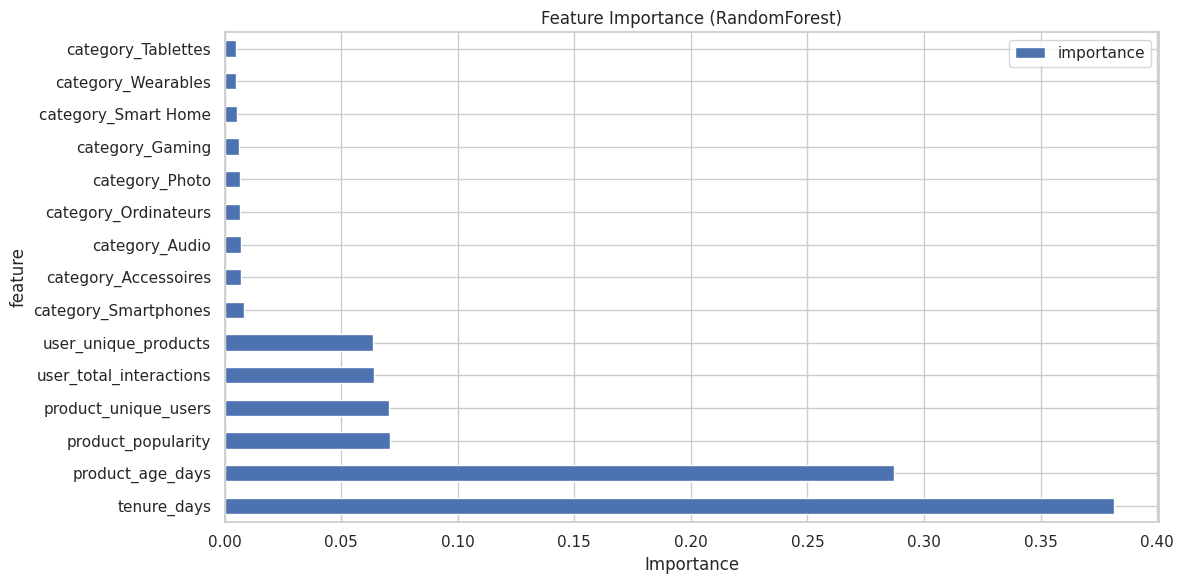

Dataset créé
Train : (6127, 16)
Test  : (1321, 16)
Performance du modèle :
Accuracy : 0.449
Precision: 0.164
Recall   : 0.805
F1-Score : 0.272
ROC-AUC  : 0.663
Top 10 Features :
                    feature  importance
4               tenure_days    0.381701
5          product_age_days    0.287293
2        product_popularity    0.070833
3      product_unique_users    0.070541
0   user_total_interactions    0.064221
1      user_unique_products    0.063848
13     category_Smartphones    0.008172
6      category_Accessoires    0.007244
7            category_Audio    0.006894
10     category_Ordinateurs    0.006794


<Figure size 1000x600 with 0 Axes>

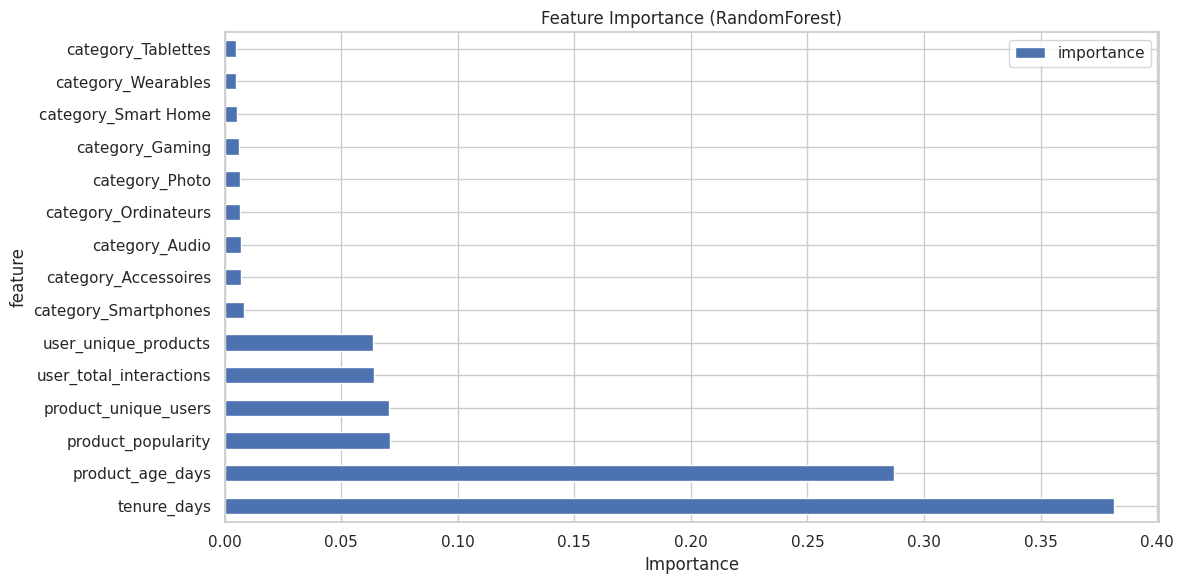

In [25]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
rng = np.random.default_rng(42)

# ======================================================
# Vérifs colonnes minimales
# ======================================================
for name, cols in {
    "users_df": ["user_id", "registration_date"],
    "products_df": ["product_id", "added_date"],
    "interactions_df": ["user_id", "product_id", "interaction_date"],
}.items():
    missing = [c for c in cols if c not in globals()[name].columns]
    if missing:
        raise ValueError(f"{name} doit contenir {missing}")

# S'assurer que les dates sont bien en datetime
users_df["registration_date"] = pd.to_datetime(users_df["registration_date"], errors="coerce")
products_df["added_date"] = pd.to_datetime(products_df["added_date"], errors="coerce")
interactions_df["interaction_date"] = pd.to_datetime(interactions_df["interaction_date"], errors="coerce")

# ======================================================
# TODO : Créer la cible (1 si interaction positive, 0 sinon)
#  - Positives:
#       * si 'rating' ou 'score' dispo: rating>=4 (ou >=0.7*max utilisateur si échelle non 1-5)
#       * sinon: toute interaction = positive (implicite)
#  - Négatives: échantillonnage de paires (user, product) non vues
# ======================================================

inter_cols = interactions_df.columns
rating_col = None
for cand in ["rating", "score", "interaction_value"]:
    if cand in inter_cols:
        rating_col = cand
        break

# Regrouper interactions par (user, product) avec la DERNIÈRE date (pour split temporel)
latest_inter = (
    interactions_df
    .sort_values("interaction_date")
    .groupby(["user_id", "product_id"], as_index=False)
    .tail(1)
)

if rating_col is not None:
    # Déterminer un seuil par utilisateur si l'échelle n'est pas 1-5
    user_max = latest_inter.groupby("user_id")[rating_col].transform("max")
    # Heuristique: si max<=5 → seuil=4 sinon seuil = 0.7*max
    thresh = np.where(user_max <= 5, 4, 0.7 * user_max)
    latest_inter["target"] = (latest_inter[rating_col] >= thresh).astype(int)
else:
    # Feedback implicite → toute interaction = positive
    latest_inter["target"] = 1

positives = latest_inter[latest_inter["target"] == 1].copy()
if positives.empty:
    raise ValueError("Aucune interaction positive détectée — vérifie ta logique de target/rating.")

# Construire des négatives en échantillonnant des produits non vus par user
all_products = products_df["product_id"].unique()
neg_rows = []

# Pour éviter de créer trop de négatifs, on en prend ~1 négatif par positif (modifiable)
neg_per_user = (
    positives.groupby("user_id")["product_id"]
    .size()
    .rename("n_pos")
    .reset_index()
)

user_seen = interactions_df.groupby("user_id")["product_id"].agg(lambda x: set(x)).to_dict()

for _, r in neg_per_user.iterrows():
    u = r["user_id"]
    n_pos = int(r["n_pos"])
    seen = user_seen.get(u, set())
    candidates = np.array(list(set(all_products) - seen))
    if candidates.size == 0:
        continue
    k = min(n_pos, candidates.size)
    sampled = rng.choice(candidates, size=k, replace=False)
    # Date pour les négatifs = dernière date d'interaction de l'utilisateur (pour split temporel)
    u_last_date = interactions_df.loc[interactions_df["user_id"] == u, "interaction_date"].max()
    for pid in sampled:
        neg_rows.append((u, pid, 0, u_last_date))

negatives = pd.DataFrame(neg_rows, columns=["user_id", "product_id", "target", "interaction_date"])

# Dataset binaire final
dataset = pd.concat([
    positives[["user_id", "product_id", "target", "interaction_date"]],
    negatives
], ignore_index=True)

# ======================================================
# Features utilisateur & produit (simples mais efficaces)
#  - user: tenure_days, total_interactions, unique_products
#  - product: age_days, product_popularity, unique_users
#  - + optionnel: category, brand si présents (one-hot)
# ======================================================

# Agrégats utilisateurs (globaux)
usr_agg = interactions_df.groupby("user_id").agg(
    user_total_interactions=("product_id", "count"),
    user_unique_products=("product_id", "nunique"),
    user_last_interaction=("interaction_date", "max"),
).reset_index()

# Agrégats produits (globaux)
prd_agg = interactions_df.groupby("product_id").agg(
    product_popularity=("user_id", "count"),
    product_unique_users=("user_id", "nunique"),
    product_last_interaction=("interaction_date", "max"),
).reset_index()

# Merge avec users_df / products_df
u = users_df[["user_id", "registration_date"]].copy()
p_cols = ["product_id", "added_date"]
for optional in ["category", "brand"]:
    if optional in products_df.columns:
        p_cols.append(optional)
p = products_df[p_cols].copy()

# Merge dataset avec features
data = dataset.merge(u, on="user_id", how="left").merge(usr_agg, on="user_id", how="left")
data = data.merge(p, on="product_id", how="left").merge(prd_agg, on="product_id", how="left")

# Features temporelles relatives au moment de la prédiction (ici, interaction_date/last_date user)
# Tenure utilisateur au moment de la ligne
data["tenure_days"] = (data["interaction_date"] - data["registration_date"]).dt.days
# Âge du produit au moment de la ligne
data["product_age_days"] = (data["interaction_date"] - data["added_date"]).dt.days

# Remplir les NaN éventuels
for col in ["tenure_days", "product_age_days", "user_total_interactions", "user_unique_products",
            "product_popularity", "product_unique_users"]:
    if col in data.columns:
        data[col] = data[col].fillna(0)

# Encodage catégoriel simple (RF n'exige pas de scaling)
categoricals = []
if "category" in data.columns:
    categoricals.append("category")
if "brand" in data.columns:
    categoricals.append("brand")

data_enc = pd.get_dummies(data, columns=categoricals, dummy_na=False)

# Colonnes features (exclure IDs, dates, target)
drop_cols = {"user_id", "product_id", "target", "interaction_date", "registration_date", "added_date",
             "user_last_interaction", "product_last_interaction"}
feature_cols = [c for c in data_enc.columns if c not in drop_cols]

X = data_enc[feature_cols].astype(float)
y = data_enc["target"].astype(int)

# ======================================================
# TODO : Split temporel (80% train, 20% test)
#  - on split par date d'interaction
# ======================================================
cutoff = data["interaction_date"].quantile(0.8)
train_idx = data["interaction_date"] <= cutoff
test_idx  = data["interaction_date"] > cutoff

X_train, y_train = X.loc[train_idx], y.loc[train_idx]
X_test,  y_test  = X.loc[test_idx],  y.loc[test_idx]

print("Dataset créé")
print(f"Train : {X_train.shape}")
print(f"Test  : {X_test.shape}")

# ======================================================
# TODO : Entraîner le modèle
# ======================================================

model_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
model_rf.fit(X_train, y_train)   # <-- fit

# Évaluation
y_pred = model_rf.predict(X_test)                    # <-- prédictions classes
y_proba = model_rf.predict_proba(X_test)[:, 1]       # probabilités classe 1

print("Performance du modèle :")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall   : {recall_score(y_test, y_pred):.3f}")
print(f"F1-Score : {f1_score(y_test, y_pred):.3f}")
try:
    print(f"ROC-AUC  : {roc_auc_score(y_test, y_proba):.3f}")
except Exception:
    pass

# ======================================================
# TODO : Feature Importance
# ======================================================

feature_importance = pd.DataFrame({
    "feature": feature_cols,
    "importance": model_rf.feature_importances_
}).sort_values("importance", ascending=False)

print("Top 10 Features :")
print(feature_importance.head(10))

# Visualisation (matplotlib, pas de seaborn, pas de style/couleur forcée)
plt.figure(figsize=(10, 6))
feature_importance.head(15).plot(x="feature", y="importance", kind="barh")
plt.xlabel("Importance")
plt.title("Feature Importance (RandomForest)")
plt.tight_layout()
plt.show()

# ======================================================
# Prédire les probabilités d'interaction pour un user donné (exemple)
#  - Construire un lot (user, produits candidats) avec features identiques
# ======================================================
def predict_user_product_proba(user_id, product_ids, as_df=True):
    """
    Calcule les probabilités d'interaction pour un utilisateur cible et une liste de produits.
    Recrée les mêmes features que pour l'entraînement (simplifiées).
    """
    # Dernière date connue pour l'utilisateur (pour approx des features temporelles)
    u_last_date = interactions_df.loc[interactions_df["user_id"] == user_id, "interaction_date"].max()
    if pd.isna(u_last_date):
        # user froid : on prend une date récente (max globale)
        u_last_date = interactions_df["interaction_date"].max()

    # Sous-ensembles nécessaires
    u_row = u[u["user_id"] == user_id]
    if u_row.empty:
        # user inconnu : tenure 0
        base_u = dict(registration_date=pd.Timestamp(u_last_date) - pd.Timedelta(days=0))
    else:
        base_u = dict(registration_date=u_row["registration_date"].iloc[0])

    # Préparer frame candidats
    cand = pd.DataFrame({
        "user_id": user_id,
        "product_id": product_ids,
        "interaction_date": u_last_date
    })

    # Merge avec features globales
    cand = cand.merge(u, on="user_id", how="left").merge(usr_agg, on="user_id", how="left")
    cand = cand.merge(p, on="product_id", how="left").merge(prd_agg, on="product_id", how="left")

    # Calcul features temporelles
    cand["tenure_days"] = (cand["interaction_date"] - cand["registration_date"]).dt.days
    cand["product_age_days"] = (cand["interaction_date"] - cand["added_date"]).dt.days

    for col in ["tenure_days", "product_age_days", "user_total_interactions", "user_unique_products",
                "product_popularity", "product_unique_users"]:
        if col in cand.columns:
            cand[col] = cand[col].fillna(0)

    # One-hot sur mêmes colonnes que train
    cand_enc = pd.get_dummies(cand, columns=categoricals, dummy_na=False)

    # Aligner colonnes avec X (ajouter colonnes manquantes à 0)
    for col in X.columns:
        if col not in cand_enc.columns:
            cand_enc[col] = 0.0
    # Retirer colonnes inconnues
    cand_enc = cand_enc[X.columns]

    proba = model_rf.predict_proba(cand_enc)[:, 1]
    if as_df:
        out = cand[["user_id", "product_id"]].copy()
        out["proba"] = proba
        return out.sort_values("proba", ascending=False)
    return proba

# Exemple d’usage :
# user_ex = users_df["user_id"].iloc[0]
# candidats = products_df["product_id"].sample(10, random_state=42).tolist()
# predict_user_product_proba(user_ex, candidats).head()
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
rng = np.random.default_rng(42)

# ======================================================
# Vérifs colonnes minimales
# ======================================================
for name, cols in {
    "users_df": ["user_id", "registration_date"],
    "products_df": ["product_id", "added_date"],
    "interactions_df": ["user_id", "product_id", "interaction_date"],
}.items():
    missing = [c for c in cols if c not in globals()[name].columns]
    if missing:
        raise ValueError(f"{name} doit contenir {missing}")

# S'assurer que les dates sont bien en datetime
users_df["registration_date"] = pd.to_datetime(users_df["registration_date"], errors="coerce")
products_df["added_date"] = pd.to_datetime(products_df["added_date"], errors="coerce")
interactions_df["interaction_date"] = pd.to_datetime(interactions_df["interaction_date"], errors="coerce")

# ======================================================
# TODO : Créer la cible (1 si interaction positive, 0 sinon)
#  - Positives:
#       * si 'rating' ou 'score' dispo: rating>=4 (ou >=0.7*max utilisateur si échelle non 1-5)
#       * sinon: toute interaction = positive (implicite)
#  - Négatives: échantillonnage de paires (user, product) non vues
# ======================================================

inter_cols = interactions_df.columns
rating_col = None
for cand in ["rating", "score", "interaction_value"]:
    if cand in inter_cols:
        rating_col = cand
        break

# Regrouper interactions par (user, product) avec la DERNIÈRE date (pour split temporel)
latest_inter = (
    interactions_df
    .sort_values("interaction_date")
    .groupby(["user_id", "product_id"], as_index=False)
    .tail(1)
)

if rating_col is not None:
    # Déterminer un seuil par utilisateur si l'échelle n'est pas 1-5
    user_max = latest_inter.groupby("user_id")[rating_col].transform("max")
    # Heuristique: si max<=5 → seuil=4 sinon seuil = 0.7*max
    thresh = np.where(user_max <= 5, 4, 0.7 * user_max)
    latest_inter["target"] = (latest_inter[rating_col] >= thresh).astype(int)
else:
    # Feedback implicite → toute interaction = positive
    latest_inter["target"] = 1

positives = latest_inter[latest_inter["target"] == 1].copy()
if positives.empty:
    raise ValueError("Aucune interaction positive détectée — vérifie ta logique de target/rating.")

# Construire des négatives en échantillonnant des produits non vus par user
all_products = products_df["product_id"].unique()
neg_rows = []

# Pour éviter de créer trop de négatifs, on en prend ~1 négatif par positif (modifiable)
neg_per_user = (
    positives.groupby("user_id")["product_id"]
    .size()
    .rename("n_pos")
    .reset_index()
)

user_seen = interactions_df.groupby("user_id")["product_id"].agg(lambda x: set(x)).to_dict()

for _, r in neg_per_user.iterrows():
    u = r["user_id"]
    n_pos = int(r["n_pos"])
    seen = user_seen.get(u, set())
    candidates = np.array(list(set(all_products) - seen))
    if candidates.size == 0:
        continue
    k = min(n_pos, candidates.size)
    sampled = rng.choice(candidates, size=k, replace=False)
    # Date pour les négatifs = dernière date d'interaction de l'utilisateur (pour split temporel)
    u_last_date = interactions_df.loc[interactions_df["user_id"] == u, "interaction_date"].max()
    for pid in sampled:
        neg_rows.append((u, pid, 0, u_last_date))

negatives = pd.DataFrame(neg_rows, columns=["user_id", "product_id", "target", "interaction_date"])

# Dataset binaire final
dataset = pd.concat([
    positives[["user_id", "product_id", "target", "interaction_date"]],
    negatives
], ignore_index=True)

# ======================================================
# Features utilisateur & produit (simples mais efficaces)
#  - user: tenure_days, total_interactions, unique_products
#  - product: age_days, product_popularity, unique_users
#  - + optionnel: category, brand si présents (one-hot)
# ======================================================

# Agrégats utilisateurs (globaux)
usr_agg = interactions_df.groupby("user_id").agg(
    user_total_interactions=("product_id", "count"),
    user_unique_products=("product_id", "nunique"),
    user_last_interaction=("interaction_date", "max"),
).reset_index()

# Agrégats produits (globaux)
prd_agg = interactions_df.groupby("product_id").agg(
    product_popularity=("user_id", "count"),
    product_unique_users=("user_id", "nunique"),
    product_last_interaction=("interaction_date", "max"),
).reset_index()

# Merge avec users_df / products_df
u = users_df[["user_id", "registration_date"]].copy()
p_cols = ["product_id", "added_date"]
for optional in ["category", "brand"]:
    if optional in products_df.columns:
        p_cols.append(optional)
p = products_df[p_cols].copy()

# Merge dataset avec features
data = dataset.merge(u, on="user_id", how="left").merge(usr_agg, on="user_id", how="left")
data = data.merge(p, on="product_id", how="left").merge(prd_agg, on="product_id", how="left")

# Features temporelles relatives au moment de la prédiction (ici, interaction_date/last_date user)
# Tenure utilisateur au moment de la ligne
data["tenure_days"] = (data["interaction_date"] - data["registration_date"]).dt.days
# Âge du produit au moment de la ligne
data["product_age_days"] = (data["interaction_date"] - data["added_date"]).dt.days

# Remplir les NaN éventuels
for col in ["tenure_days", "product_age_days", "user_total_interactions", "user_unique_products",
            "product_popularity", "product_unique_users"]:
    if col in data.columns:
        data[col] = data[col].fillna(0)

# Encodage catégoriel simple (RF n'exige pas de scaling)
categoricals = []
if "category" in data.columns:
    categoricals.append("category")
if "brand" in data.columns:
    categoricals.append("brand")

data_enc = pd.get_dummies(data, columns=categoricals, dummy_na=False)

# Colonnes features (exclure IDs, dates, target)
drop_cols = {"user_id", "product_id", "target", "interaction_date", "registration_date", "added_date",
             "user_last_interaction", "product_last_interaction"}
feature_cols = [c for c in data_enc.columns if c not in drop_cols]

X = data_enc[feature_cols].astype(float)
y = data_enc["target"].astype(int)

# ======================================================
# TODO : Split temporel (80% train, 20% test)
#  - on split par date d'interaction
# ======================================================
cutoff = data["interaction_date"].quantile(0.8)
train_idx = data["interaction_date"] <= cutoff
test_idx  = data["interaction_date"] > cutoff

X_train, y_train = X.loc[train_idx], y.loc[train_idx]
X_test,  y_test  = X.loc[test_idx],  y.loc[test_idx]

print("Dataset créé")
print(f"Train : {X_train.shape}")
print(f"Test  : {X_test.shape}")

# ======================================================
# TODO : Entraîner le modèle
# ======================================================

model_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
model_rf.fit(X_train, y_train)   # <-- fit

# Évaluation
y_pred = model_rf.predict(X_test)                    # <-- prédictions classes
y_proba = model_rf.predict_proba(X_test)[:, 1]       # probabilités classe 1

print("Performance du modèle :")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall   : {recall_score(y_test, y_pred):.3f}")
print(f"F1-Score : {f1_score(y_test, y_pred):.3f}")
try:
    print(f"ROC-AUC  : {roc_auc_score(y_test, y_proba):.3f}")
except Exception:
    pass

# ======================================================
# TODO : Feature Importance
# ======================================================

feature_importance = pd.DataFrame({
    "feature": feature_cols,
    "importance": model_rf.feature_importances_
}).sort_values("importance", ascending=False)

print("Top 10 Features :")
print(feature_importance.head(10))

# Visualisation (matplotlib, pas de seaborn, pas de style/couleur forcée)
plt.figure(figsize=(10, 6))
feature_importance.head(15).plot(x="feature", y="importance", kind="barh")
plt.xlabel("Importance")
plt.title("Feature Importance (RandomForest)")
plt.tight_layout()
plt.show()

# ======================================================
# Prédire les probabilités d'interaction pour un user donné (exemple)
#  - Construire un lot (user, produits candidats) avec features identiques
# ======================================================
def predict_user_product_proba(user_id, product_ids, as_df=True):
    """
    Calcule les probabilités d'interaction pour un utilisateur cible et une liste de produits.
    Recrée les mêmes features que pour l'entraînement (simplifiées).
    """
    # Dernière date connue pour l'utilisateur (pour approx des features temporelles)
    u_last_date = interactions_df.loc[interactions_df["user_id"] == user_id, "interaction_date"].max()
    if pd.isna(u_last_date):
        # user froid : on prend une date récente (max globale)
        u_last_date = interactions_df["interaction_date"].max()

    # Sous-ensembles nécessaires
    u_row = u[u["user_id"] == user_id]
    if u_row.empty:
        # user inconnu : tenure 0
        base_u = dict(registration_date=pd.Timestamp(u_last_date) - pd.Timedelta(days=0))
    else:
        base_u = dict(registration_date=u_row["registration_date"].iloc[0])

    # Préparer frame candidats
    cand = pd.DataFrame({
        "user_id": user_id,
        "product_id": product_ids,
        "interaction_date": u_last_date
    })

    # Merge avec features globales
    cand = cand.merge(u, on="user_id", how="left").merge(usr_agg, on="user_id", how="left")
    cand = cand.merge(p, on="product_id", how="left").merge(prd_agg, on="product_id", how="left")

    # Calcul features temporelles
    cand["tenure_days"] = (cand["interaction_date"] - cand["registration_date"]).dt.days
    cand["product_age_days"] = (cand["interaction_date"] - cand["added_date"]).dt.days

    for col in ["tenure_days", "product_age_days", "user_total_interactions", "user_unique_products",
                "product_popularity", "product_unique_users"]:
        if col in cand.columns:
            cand[col] = cand[col].fillna(0)

    # One-hot sur mêmes colonnes que train
    cand_enc = pd.get_dummies(cand, columns=categoricals, dummy_na=False)

    # Aligner colonnes avec X (ajouter colonnes manquantes à 0)
    for col in X.columns:
        if col not in cand_enc.columns:
            cand_enc[col] = 0.0
    # Retirer colonnes inconnues
    cand_enc = cand_enc[X.columns]

    proba = model_rf.predict_proba(cand_enc)[:, 1]
    if as_df:
        out = cand[["user_id", "product_id"]].copy()
        out["proba"] = proba
        return out.sort_values("proba", ascending=False)
    return proba

# Exemple d’usage :
# user_ex = users_df["user_id"].iloc[0]
# candidats = products_df["product_id"].sample(10, random_state=42).tolist()
# predict_user_product_proba(user_ex, candidats).head()

